In [1]:
import numpy as np
import pandas as pd

from src.models.synthesis.evaluate_models import SynthesisAnalysis
from src.models.synthesis.train_models import SynthesisTraining

In [2]:
st = SynthesisTraining()
sa = SynthesisAnalysis()

results = st.load_training_models()
indices = sa.load_performance_indices()

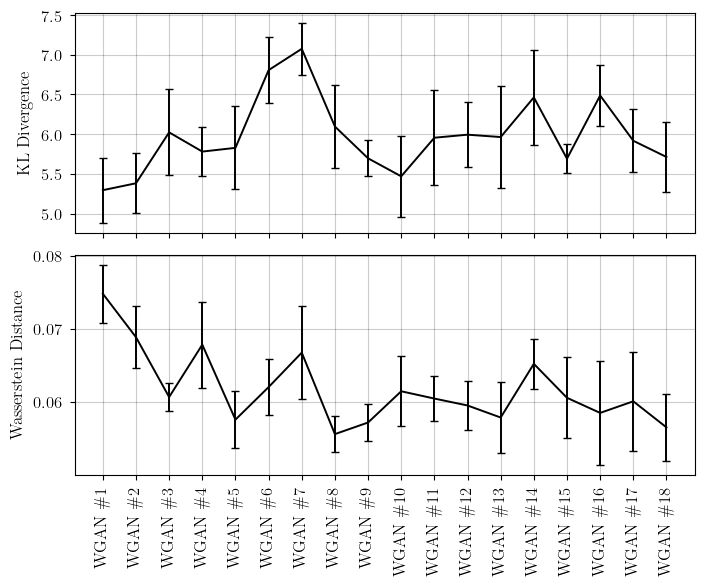

In [3]:
import matplotlib.pyplot as plt
import numpy as np

n_folds = 5
kl_divergence = indices["kl_divergence"]
wasserstein_dist = indices["wasserstein_distance"]
models = [model["model_name"].replace("#", "\#") for model in results["outputs"]][1:]

x = np.arange(len(models))
y = np.mean(kl_divergence, axis=0)
yerr = np.std(kl_divergence, axis=0) / np.sqrt(n_folds - 1)

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
axs[0].errorbar(x=x, y=y[1:], yerr=yerr[1:], fmt="", capsize=3)
axs[0].grid(True)
# axs[0].set_ylabel(r"$\widehat{D}_{\mathrm{KL}}(P|Q)$")
axs[0].set_ylabel("KL Divergence")

y = np.mean(wasserstein_dist, axis=0)
yerr = np.std(wasserstein_dist, axis=0) / np.sqrt(n_folds - 1)

axs[1].errorbar(x=x, y=y[1:], yerr=yerr[1:], fmt="", capsize=3)
axs[1].grid(True)
# axs[1].set_ylabel(r"$\widehat{W}_{1}(\mu,\nu)$")
axs[1].set_ylabel("Wasserstein Distance")
axs[1].set_xticks(x, models, rotation=90, ha="center")

f.subplots_adjust(hspace=0.1)
plt.show()